<a href="https://colab.research.google.com/github/pkor725/-MTN-Cote-d-Ivoire/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2019_12_Gideon_k_Cheruiyot_DataReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Who is more likely to have a bank account?



In [0]:
#importing libraries
import numpy as np
import pandas as pd

In [0]:
#loading the dataset
fin_df = pd.read_csv('/content/Financial Dataset - 1.csv')

In [0]:
#previewing the dataset, top
fin_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
#understanding the datatypes in the dataset
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
# knowing number of rows and columns
fin_df.shape

(23524, 13)

In [0]:
#finding null values
fin_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
#filling null values for country feature using years

#2016 is for Rwanda
fin_df[fin_df['year'] == 2016]
fin_df['country'].fillna('Rwanda', inplace = True)

#2017 for Tanzania
fin_df[fin_df['year'] == 2017]
fin_df['country'].fillna('Tanzania', inplace = True)

# since 2018 is shared by kenya and Uganda,
#We will backward fill
fin_df['country'].fillna(method = 'bfill', inplace = True)


In [0]:
#Replacing 'Don't know' response with null
fin_df.replace(to_replace = 'Dont know', value = np.nan, inplace = True)
fin_df['The relathip with head'].unique()

#Replacing Other/Dont know/RTA' response with null
fin_df.replace(to_replace = 'Other/Dont know/RTA', value = np.nan, inplace = True)

#Replacing 'Dont Know/Refuse to answer' response with null
fin_df.replace(to_replace = 'Dont Know/Refuse to answer', value = np.nan, inplace = True)


In [0]:
#dropping null values
fin_df.dropna(inplace = True)
fin_df.shape

(23343, 13)

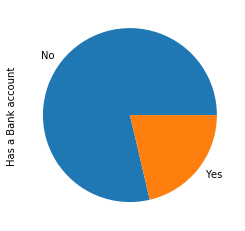

In [78]:
#univariate analysis, having a bvank account
fin_df.groupby(['Has a Bank account'])['Has a Bank account'].count().plot(kind = 'pie')

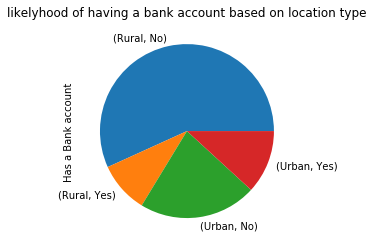

In [57]:
#	relationship betwween having a bank account and type of location
import matplotlib.pyplot as plt
fin_df.groupby(['Type of Location','Has a Bank account'])['Has a Bank account'].count().plot(kind = 'pie')
plt.title('likelyhood of having a bank account based on location type')
plt.show()
#living in rural areas decreases the chances of one having a bank account


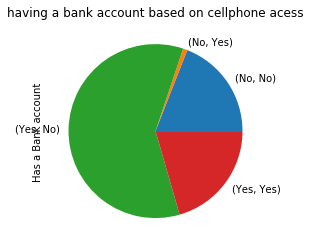

In [58]:
#relationship between having bank account and cellphone access
fin_df.groupby(['Cell Phone Access','Has a Bank account'])['Has a Bank account'].count().plot(kind = 'pie')
plt.title('having a bank account based on cellphone acess')
plt.show()
#there is no clear relationship between the likelyhood of having a bank account and cellphone access

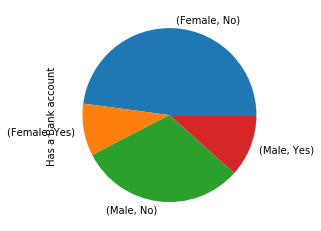

In [59]:
#relationship between having bank account and gender
fin_df.groupby(['gender_of_respondent','Has a Bank account'])['Has a Bank account'].count().plot(kind = 'pie')
plt.show()
#Males are more likely to have a bank compared to females

In [0]:
#relationship between having bank account and gender
fin_df.groupby(['Respondent Age','Has a Bank account'])['Has a Bank account'].count().plot(kind = 'hist', bins = 10)
plt.show()


In [0]:
#Saving cleaned data to csv formatt
fin_df.to_csv('fin.csv')

In [0]:
f_df = pd.read_csv('/content/fin.csv') 
f_df.drop(['country','uniqueid','year', 'Unnamed: 0'], axis = 1, inplace = True)

In [73]:
#ENCODING level of education
f_df = pd.read_csv('/content/fin.csv') 
education = {
           'No formal education': 1, 'Primary education': 2, 'Secondary education': 3, 'Vocational/Specialised training':4, 'Tertiary education': 5}
f_df['Level of Educuation'] = f_df['Level of Educuation'].map(education)
#ENCODING level of education
occupation = {
           'Farming and Fishing': 8, 'Self employed': 4, 'No Income': 3, 'Informally employed':5, 'Other Income': 9, 'Formally employed Private': 10, ' Informally employed':7,  'Remittance Dependent': 2, 'Government Dependent':11}
f_df['Type of Job'] = f_df['Type of Job'].map(occupation)

#Encoding Has a Bank account
bank = {
           'Yes': 1, 'No': 0}
f_df['Has a Bank account'] = f_df['Has a Bank account'].map(bank)
#encoding gender of the respondent
gender = {
           'Male': 1, 'Female': 0}
f_df['gender_of_respondent'] = f_df['gender_of_respondent'].map(gender)
#encoding Type of Location	Cell 
location = {
           'Rural': 1, 'Urban': 0}
f_df['Type of Location'] = f_df['Type of Location'].map(location)

#encoding Cell Phone Access	
access = {
           'Yes': 1, 'No': 0}
f_df['Cell Phone Access'] = f_df['Cell Phone Access'].map(access)
#encoding The relathip with head	
rlshp = {
           'Spouse': 2, 'Head of Household': 1, 'Child': 3, 'Parent': 4, 'Other relative	Single/Never': 5, 'Other non-relatives':9 }
f_df['The relathip with head'] = f_df['The relathip with head'].map(rlshp)
#encoding marital status	
status = {
           'Married/Living together': 2, 'Widowed': 1, 'Single/Never Married': 4, 'Divorced/Seperated': 6, 'Other relative	Single/Never': 5 }
f_df['marital_status'] = f_df['marital_status'].map(status)
#encoding countries

f_df

,Unnamed: 0,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,0,2.0,2,3.0,4.0
1,1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,0,1.0,1,1.0,11.0
2,2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,NaN,4,4.0,4.0
3,3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,0,1.0,2,2.0,10.0
4,4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,3.0,4,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23211,23519,Uganda,2018,uniqueid_2113,0,1,1,4.0,48.0,0,1.0,6,1.0,9.0
23212,23520,Uganda,2018,uniqueid_2114,0,1,1,2.0,27.0,0,1.0,4,3.0,9.0
23213,23521,Uganda,2018,uniqueid_2115,0,1,1,5.0,27.0,0,4.0,1,2.0,9.0
23214,23522,Uganda,2018,uniqueid_2116,0,0,1,7.0,30.0,0,4.0,6,3.0,4.0


In [0]:
f_df.dropna(inplace = True)
f_df.drop(['country','year', 'uniqueid'], axis = 1 , inplace = True)



In [75]:
f_df

,Unnamed: 0,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,1,1,1,3.0,24.0,0,2.0,2,3.0,4.0
1,1,0,1,0,5.0,70.0,0,1.0,1,1.0,11.0
3,3,0,1,1,5.0,34.0,0,1.0,2,2.0,10.0
4,4,0,0,0,8.0,26.0,1,3.0,4,2.0,5.0
5,5,0,1,0,7.0,26.0,0,2.0,2,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
23211,23519,0,1,1,4.0,48.0,0,1.0,6,1.0,9.0
23212,23520,0,1,1,2.0,27.0,0,1.0,4,3.0,9.0
23213,23521,0,1,1,5.0,27.0,0,4.0,1,2.0,9.0
23214,23522,0,0,1,7.0,30.0,0,4.0,6,3.0,4.0


In [0]:
#dividing the dataset
X = f_df.iloc[:, 2:10].values
y = f_df.iloc[:, 1].values

In [0]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [20]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
#Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3797   59]
 [ 480   94]]
Accuracy0.8783295711060948
